# Percolation Project

Done as part of a Class project. This project implements a simulation of site percolation on a 2D square lattice. It explores how clusters form, whether they percolate across the grid, and estimates the percolation threshold using Monte Carlo methods

## Lattice Generation

The following code generates the square lattice.  

[[1 0 1 1 1 1]
 [1 0 1 0 0 1]
 [1 1 1 0 1 0]
 [0 0 0 1 1 1]
 [0 1 1 1 1 0]
 [1 1 0 1 1 1]]


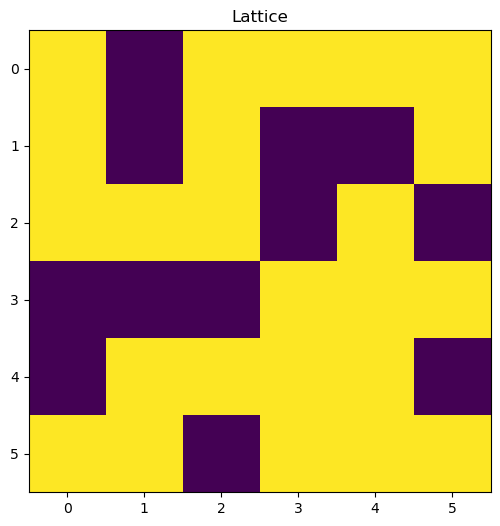

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def generate_lattice(L, p):
    '''Generate an LxL matrix where each site is iid 1 with probability p and 0 with probability (1-p)'''
    #rng = default_rng()
    lat = (np.random.rand(L,L)<p).astype(int)
    return lat

if __name__ == "__main__":
    L = 6
    p = 0.6
    lat = generate_lattice(L, p)

    print(lat)

    fig, ax = plt.subplots(1,1, figsize=[6,6])
    # Plot the lattice
    ax.imshow(lat)
    ax.set_title("Lattice")

## Problem 1, Lattice Clustering

[[0 1 0 1 1 1]
 [0 1 1 0 1 0]
 [0 0 0 1 1 1]
 [1 0 1 1 0 1]
 [1 0 1 1 0 0]
 [1 0 1 0 1 1]]


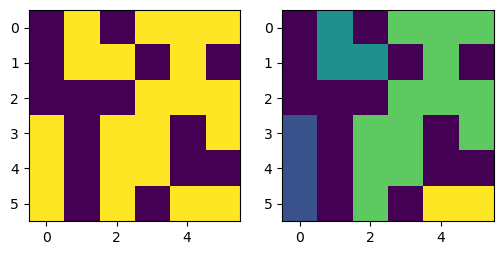

In [5]:
def fill_cluster_from_node(lat, starting_site, fill_value):
    '''fills the largest possible connected component of non-zero values with fill_value
    
    find_cluster_from_node(lat, starting_site, fill_value) 
    starting site is a list or array with the indices
    changes lat in place.
    fill_value must be distinct from the non-zero values to be filled'''
    N = len(lat)
    next_layer = [tuple(starting_site)]
    
    while len(next_layer) > 0:
        cur_layer = next_layer
        next_layer = [] 
        for site in cur_layer:
            i,j = site
            lat[i,j] = fill_value
            for k in [i-1,i+1]:
                if k>=0 and k < N and lat[k,j] != 0 and lat[k,j] != fill_value:
                    if (k,j) not in next_layer:
                        next_layer.append((k,j))
            for k in [j-1,j+1]:
                if k>=0 and k < N and lat[i,k] != 0 and lat[i,k] != fill_value:
                    if (i,k) not in next_layer:
                        next_layer.append((i,k))
    
    return
    




def label_clusters(lat):
    '''Creates a labeling of the unique connected components of the lattice
    
    mat = label_clusters(lat)
    lat is a matrix where 1 indicates occupied sites and 0 are unoccupied sites
    mat is a matrix with same dimensions of lat, 0 still indicates unoccupied,
    the occupied clusters are labeled 1 to m, where m are the number of connected components.
    '''
    mat = lat*-1
    def find_first_one(mat):
        L = len(mat)  
        starting_site = [0, 0]
        for j in range(L):
            for i in range(L):
                if mat[i][j] == -1: 
                    starting_site = [i, j]
                    return starting_site  
    
        return None
        
    fill_value = 1
    while find_first_one(mat) != None:
        starting_site = find_first_one(mat)
        fill_cluster_from_node(mat, starting_site, fill_value)
        fill_value+=1
       
    return mat

if __name__ == "__main__":
    L = 6
    p = 0.6
    lat = generate_lattice(L, p)
    mat = label_clusters(lat)

    print(lat)

    fig, ax = plt.subplots(1,2, figsize=[6,6])
    # Plot the lattice
    ax[0].imshow(lat)
    ax[1].imshow(mat)

    

    
    

    
    
    

## Problem 2, Detecting Percolation

In the code below, we implement `percolate(mat)`.  It takes in the occupation lattice and returns `True` if the lattice percolates and `False` otherwise. Include testing for both lattice that do and do not percolate.

True


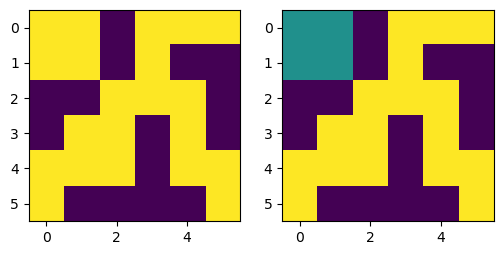

In [7]:



def percolate(lat):
    '''detects if there is a connected component going from left to right of the lattice'''
    L =  len(lat)
    mat = label_clusters(lat)
    
    arr1 =[]
    arr2 = []
    for i in range(L):
        if lat[i,0] !=0:
            arr1.append(mat[i,0])
        if lat[i, L-1] !=0 :
            arr2.append(mat[i,L-1])
    
    for elem in arr1:
         if elem in arr2:
             return True
    return False


if __name__ == "__main__":
    L = 6
    p = 0.5
    lat = generate_lattice(L, p)
    mat = mat = label_clusters(lat)
    print(percolate(lat))
    fig, ax = plt.subplots(1,2, figsize=[6,6])
    ax[0].imshow(lat)
    ax[1].imshow(mat)
    
    

## Problem 3, Sampling

Run the Monte Carlo sampling for the 3 by 3 lattice, with 100 samples for each value of $p$.  Plot the sampled percolation probability as a function of $p$.  On the same axis, also plot the exact formula you found in your written exercise for percolation theory.

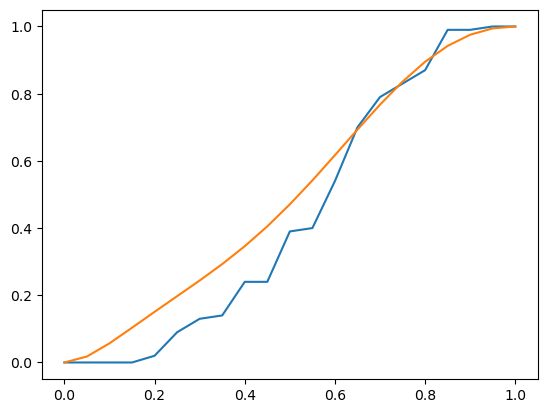

In [9]:

import matplotlib.pyplot as plt

if __name__ == "__main__":
    Nreps = 100
    ps = np.linspace(0,1,21)
    L = 3

    # This array will store the computed percolation probabilities.
    percs = 0*ps
    for j,p in enumerate(ps):
        sum = 0
        for i in range(Nreps):
            lat = generate_lattice(L, p)
            if percolate(lat):
                sum += 1
        percs[j] = sum/Nreps
        
    def my_function(p):
        return -p**9 + 9*p**8 -38*p**7 + 93*p**6 - 131*p**5 + 102*p**4 - 42*p**3 + 9*p**2 
    f_values = my_function(ps)     
    plt.plot(ps, percs)
    plt.plot(ps,f_values)  #Insert your analytical formula that you derived 
    # for the site percolation probability here.


## Problem 4, Finding Percolation Threshold

Use sampling with the following three lattice sizes $L = 20,100,500,$ choose a value of `Nreps` to get good convergence while not running for too long (30 minutes or less is reasonable).  Look for the value of $p$ where a sharp transition of the percolation probability occurs.  This is called the **Percolation Threshold**.  Restrict the range of `ps` to an interval of length 0.2 to zoom in on the transition region.   


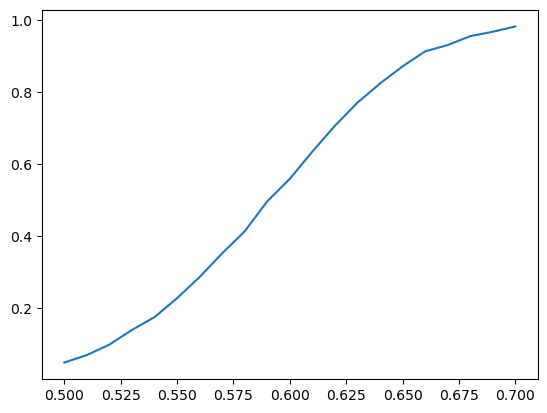

In [11]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    Nreps = 5000
    ps = np.linspace(0.5,0.7,21)
    L = 20

    # This array will store the computed percolation probabilities.
    percs = 0*ps
    for j,p in enumerate(ps):
        sum = 0
        for i in range(Nreps):
            lat = generate_lattice(L, p)
            if percolate(lat):
                sum += 1
        percs[j] = sum/Nreps     
    plt.plot(ps, percs)
  

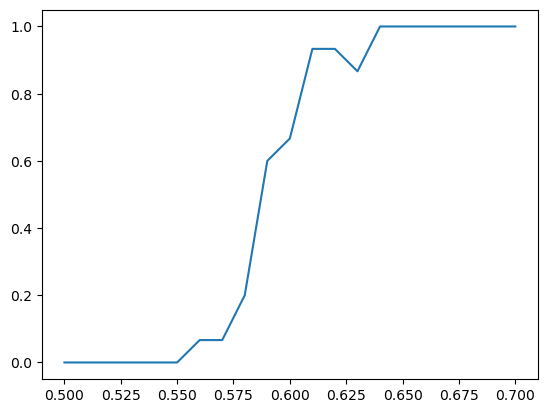

In [12]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    Nreps = 15
    ps = np.linspace(0.5,0.7,21)
    L = 100

    # This array will store the computed percolation probabilities.
    percs = 0*ps
    for j,p in enumerate(ps):
        sum = 0
        for i in range(Nreps):
            lat = generate_lattice(L, p)
            if percolate(lat):
                sum += 1
        percs[j] = sum/Nreps     
    plt.plot(ps, percs)

In [ ]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    Nreps = 2
    ps = np.linspace(0.5,0.7,10)
    L =  500

    # This array will store the computed percolation probabilities.
    percs = 0*ps
    for j,p in enumerate(ps):
        sum = 0
        for i in range(Nreps):
            lat = generate_lattice(L, p)
            if percolate(lat):
                sum += 1
        percs[j] = sum/Nreps     
    plt.plot(ps, percs)

hence approximately, 
when L = 20 , percolation threshold = 5.75
when L =100,  percolation threshold = 5.8 
when L = 500 percolation threshold =  5.85